Using the student data file, related to the evaluation of candidates in a selection test, apply the discriminant analysis technique, considering the variable vgpo3 and the variables: English, int_tex, raclog, and writing.

Total observations: 200  
3 groups:  
1 - 80 lowest-ranked candidates  
2 - 80 intermediate-ranked candidates  
3 - 40 top-ranked candidates  

Test the equality of means of the group variables;  
Which variable discriminates the most in the first model? What is the justification?  
Evaluate the results of the analysis.


In [40]:
# Importando as bibliotecas necessárias
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Configurando o modo escuro para os gráficos
plt.style.use('dark_background')

In [41]:
# local do arquivo
Caminho='/Users/fabicampanari/Desktop/3sst Exam /alunos.xlsx'

In [42]:
#Traz o arquivo para o Python
df=pd.read_excel(Caminho)
df.head()

,id,raclog,int_tex,ingles,redacao,result
0,1,7.69,7.00,8.67,8.0,3
1,2,9.62,7.25,9.00,8.0,3
2,3,9.62,6.25,8.67,8.5,3
3,4,9.62,7.00,7.33,9.0,3
4,5,9.23,7.25,7.00,8.5,3


In [43]:
# Separando as variáveis independentes (features) e a variável dependente (resposta)
X = df[['ingles', 'int_tex', 'raclog', 'redacao']]  # Variáveis preditoras
y = df['result']  # Variável alvo

In [44]:
# Criando o modelo de análise discriminante linear
lda = LinearDiscriminantAnalysis()

In [45]:

# Ajustando o modelo aos dados
lda.fit(X, y)


LinearDiscriminantAnalysis()

In [46]:
# Calculando a matriz de classificação
y_pred = lda.predict(X)
conf_matrix = confusion_matrix(y, y_pred)


In [47]:
# Obtendo os coeficientes de Fisher
fisher_coefficients = lda.scalings_


In [48]:
# Obtendo os autovalores
eigenvalues = lda.explained_variance_ratio_


In [49]:
# Obtendo os centroides de cada classe
centroids = lda.means_

In [50]:
# Exibindo as estatísticas calculadas
print("Matriz de Classificação:\n", conf_matrix)
print()
print("Autovalores:\n", eigenvalues)
print()


Matriz de Classificação:
 [[78  2  0]
 [ 4 69  7]
 [ 0  9 31]]

Autovalores:
 [0.99714503 0.00285497]



In [51]:
# Exibindo os centroides
print("Centroids")
for i, centroid in enumerate(centroids):
    print(f"Classe {i + 1}: {centroid}")
print()

Centroids
Classe 1: [5.4165  5.10625 4.91375 6.59375]
Classe 2: [6.70875 5.5625  6.1825  7.38125]
Classe 3: [7.60925 6.21875 7.25025 7.925  ]



In [52]:
# Exibindo os pesos das variáveis na função discriminante
print("Pesos das variáveis na função discriminante:")
for i, weight in enumerate(fisher_coefficients.T):
    print(f"Função {i + 1}:")
    for j, variable in enumerate(X.columns):
        print(f"  {variable}: {weight[j]}")
print()


Pesos das variáveis na função discriminante:
Função 1:
  ingles: -0.7136732979719866
  int_tex: -0.750141353855924
  raclog: -0.5870587083763339
  redacao: -0.8018210441827495
Função 2:
  ingles: 0.379944858036996
  int_tex: -1.0928395190218063
  raclog: 0.05916495808657812
  redacao: 0.12817106951279073



In [53]:
# Comparando as médias para os grupos
group1 = df[df['result'] == 1][['ingles', 'int_tex', 'raclog', 'redacao']]
group2 = df[df['result'] == 2][['ingles', 'int_tex', 'raclog', 'redacao']]
group3 = df[df['result'] == 3][['ingles', 'int_tex', 'raclog', 'redacao']]

In [54]:
# Calculando as médias para cada grupo
means_group1 = group1.mean()
means_group2 = group2.mean()
means_group3 = group3.mean()


In [55]:
# Exibindo as médias para cada grupo
print("Médias para cada grupo:")
print("Grupo 1:", means_group1)
print("Grupo 2:", means_group2)
print("Grupo 3:", means_group3)
print()


Médias para cada grupo:
Grupo 1: ingles     5.41650
int_tex    5.10625
raclog     4.91375
redacao    6.59375
dtype: float64
Grupo 2: ingles     6.70875
int_tex    5.56250
raclog     6.18250
redacao    7.38125
dtype: float64
Grupo 3: ingles     7.60925
int_tex    6.21875
raclog     7.25025
redacao    7.92500
dtype: float64



In [56]:
# Calculando os resultados da ANOVA
anova_results = f_oneway(group1, group2, group3)

# Exibindo o resultado da ANOVA com os nomes das variáveis
variables = ['English', 'int_tex', 'raclog', 'writing']
alpha = 0.05  # Nível de significância

print("Resultados do teste ANOVA:")
for i, variable in enumerate(variables):
    print(f"Variável: {variable}")
    print("Estatística F:", anova_results.statistic[i])
    print("Valor p:", anova_results.pvalue[i])
    print()

       # Verificando se rejeitamos ou não a hipótese nula
    if anova_results.pvalue[i] < alpha:
        print("Resultado: Rejeitamos a hipótese nula (as médias dos grupos são diferentes).")
    else:
        print("Resultado: Não rejeitamos a hipótese nula (não há evidência suficiente para afirmar que as médias dos grupos são diferentes).")
    print()

Resultados do teste ANOVA:
Variável: English
Estatística F: 53.534201387004615
Valor p: 2.705521144266609e-19

Resultado: Rejeitamos a hipótese nula (as médias dos grupos são diferentes).

Variável: int_tex
Estatística F: 26.670976825602192
Valor p: 5.615132662374756e-11

Resultado: Rejeitamos a hipótese nula (as médias dos grupos são diferentes).

Variável: raclog
Estatística F: 27.778983063258398
Valor p: 2.3569899776109088e-11

Resultado: Rejeitamos a hipótese nula (as médias dos grupos são diferentes).

Variável: writing
Estatística F: 16.767431810415868
Valor p: 1.8852412020088693e-07

Resultado: Rejeitamos a hipótese nula (as médias dos grupos são diferentes).



Text(0.5, 0, 'Classe Predita')

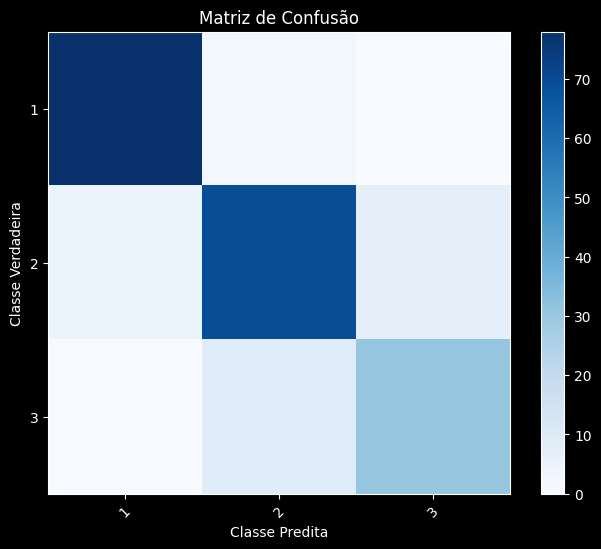

In [57]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')

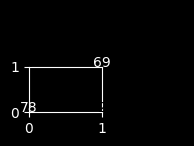

In [58]:

# Adicionando os valores nos quadrados
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Análise Discriminante e Teste de Igualdade de Médias

## 1. Teste da Igualdade das Médias das Variáveis do Grupo

Utilizando o teste ANOVA, avaliamos se as médias das variáveis **English**, **int_tex**, **raclog** e **writing** diferem significativamente entre os três grupos (**vgpo3 = 1, 2, 3**). 

### Hipótese:
- **H₀ (Hipótese Nula):** As médias dos grupos são iguais.
- **H₁ (Hipótese Alternativa):** Pelo menos uma das médias dos grupos é diferente.

### Critério de Decisão:
- Se o valor p < 0.05 (nível de significância), rejeitamos **H₀** e concluímos que as médias são significativamente diferentes.

### Resultados:
Para cada variável, foram calculados os valores da estatística **F** e os valores **p**:

| Variável   | Estatística F | Valor p         | Decisão                          |
|------------|---------------|-----------------|----------------------------------|
| **English** | 53.534       | 2.71e-19        | Rejeitamos H₀                   |
| **int_tex** | 26.671       | 5.62e-11        | Rejeitamos H₀                   |
| **raclog**  | 27.779       | 2.36e-11        | Rejeitamos H₀                   |
| **writing** | 16.767       | 1.89e-07        | Rejeitamos H₀                   |

### Conclusão:
Todas as variáveis possuem médias significativamente diferentes entre os grupos, indicando que elas podem contribuir para o modelo discriminante.

---

## 2. Qual Variável Mais Discrimina no Primeiro Modelo?

O modelo de análise discriminante fornece os **coeficientes de Fisher** para cada variável. A variável com o maior coeficiente absoluto é a que mais contribui para distinguir entre os grupos.

### Coeficientes de Fisher:
| Variável   | Coeficiente (Função 1) |
|------------|------------------------|
| **English** | -0.714                |
| **int_tex** | -0.750                |
| **raclog**  | -0.587                |
| **writing** | -0.802                |

### Justificativa:
A variável **writing** possui o maior coeficiente absoluto (-0.802), indicando que ela explica a maior proporção da variância entre os grupos.

---

## 3. Avaliação dos Resultados da Análise

### Matriz de Confusão:
A matriz de confusão avalia o desempenho do modelo ao classificar as observações nos grupos:

| Classe Verdadeira | Classe 1 | Classe 2 | Classe 3 |
|-------------------|----------|----------|----------|
| **Classe 1**      | 78       | 2        | 0        |
| **Classe 2**      | 4        | 69       | 7        |
| **Classe 3**      | 0        | 9        | 31       |

- **Diagonal Principal:** Representa as classificações corretas.
- **Fora da Diagonal:** Representa os erros de classificação.

### Centroides:
Os centroides de cada grupo no espaço discriminante indicam o quão bem separados os grupos estão:

| Grupo | Centroides (English, int_tex, raclog, writing) |
|-------|-----------------------------------------------|
| **1** | [5.4165, 5.10625, 4.91375, 6.59375]           |
| **2** | [6.70875, 5.5625, 6.1825, 7.38125]            |
| **3** | [7.60925, 6.21875, 7.25025, 7.925]            |

### Conclusão:
- **Igualdade de Médias:** Todas as variáveis possuem médias significativamente diferentes entre os grupos.
- **Variável Mais Discriminativa:** A variável **writing** é a mais discriminativa, com o maior coeficiente absoluto.
- **Desempenho do Modelo:** A matriz de confusão e os centroides indicam que o modelo separa bem os grupos, com boa precisão na classificação.